## 1. 获取S&P 500 最新股票Ticker List

In [18]:
import urllib.request
from bs4 import BeautifulSoup as bs
import csv

# 维基百科上标普500公司列表的网址
path = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
page = urllib.request.urlopen(path)

# 解析网页
soup = bs(page, 'html.parser')

# 查找包含股票信息的表格
table = soup.find('table', {'class': 'wikitable sortable'})

# 新建列表存储数据
data = []
for row in table.findAll('tr'):
    col = row.findAll('td')
    if len(col) > 0:
        ticker = col[0].get_text().strip()  # 提取股票代码
        gics_sector = col[2].get_text().strip()  # 提取GICS行业
        sector = col[3].get_text().strip()  # 提取GICS子行业
        data.append([ticker, gics_sector, sector])

# 保存数据到CSV文件
with open('sp500_tickers_gics_sectors_industry.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Ticker', 'GICS Sector', 'GICS Sub-Industry'])  # 写入表头
    writer.writerows(data)  # 写入数据

print("数据已保存到sp500_tickers_gics_sectors.csv文件中。")


数据已保存到sp500_tickers_gics_sectors.csv文件中。


## 2. 对获取到的S&P 500 stock ticker 进行分析

In [3]:
import pandas as pd

# 读取上传的CSV文件
file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/sp500_tickers_gics_sectors_industry.csv'
sp500_data = pd.read_csv(file_path)

# 查看数据的前几行和基本信息
sp500_data.head()



,Ticker,GICS Sector,GICS Sub-Industry
0,MMM,Industrials,Industrial Conglomerates
1,AOS,Industrials,Building Products
2,ABT,Health Care,Health Care Equipment
3,ABBV,Health Care,Biotechnology
4,ACN,Information Technology,IT Consulting & Other Services


In [4]:
# 分析GICS行业的分布
sector_distribution = sp500_data['GICS Sector'].value_counts()

print(sector_distribution)

Industrials               77
Financials                72
Health Care               64
Information Technology    64
Consumer Discretionary    53
Consumer Staples          38
Real Estate               31
Utilities                 30
Materials                 29
Energy                    23
Communication Services    22
Name: GICS Sector, dtype: int64


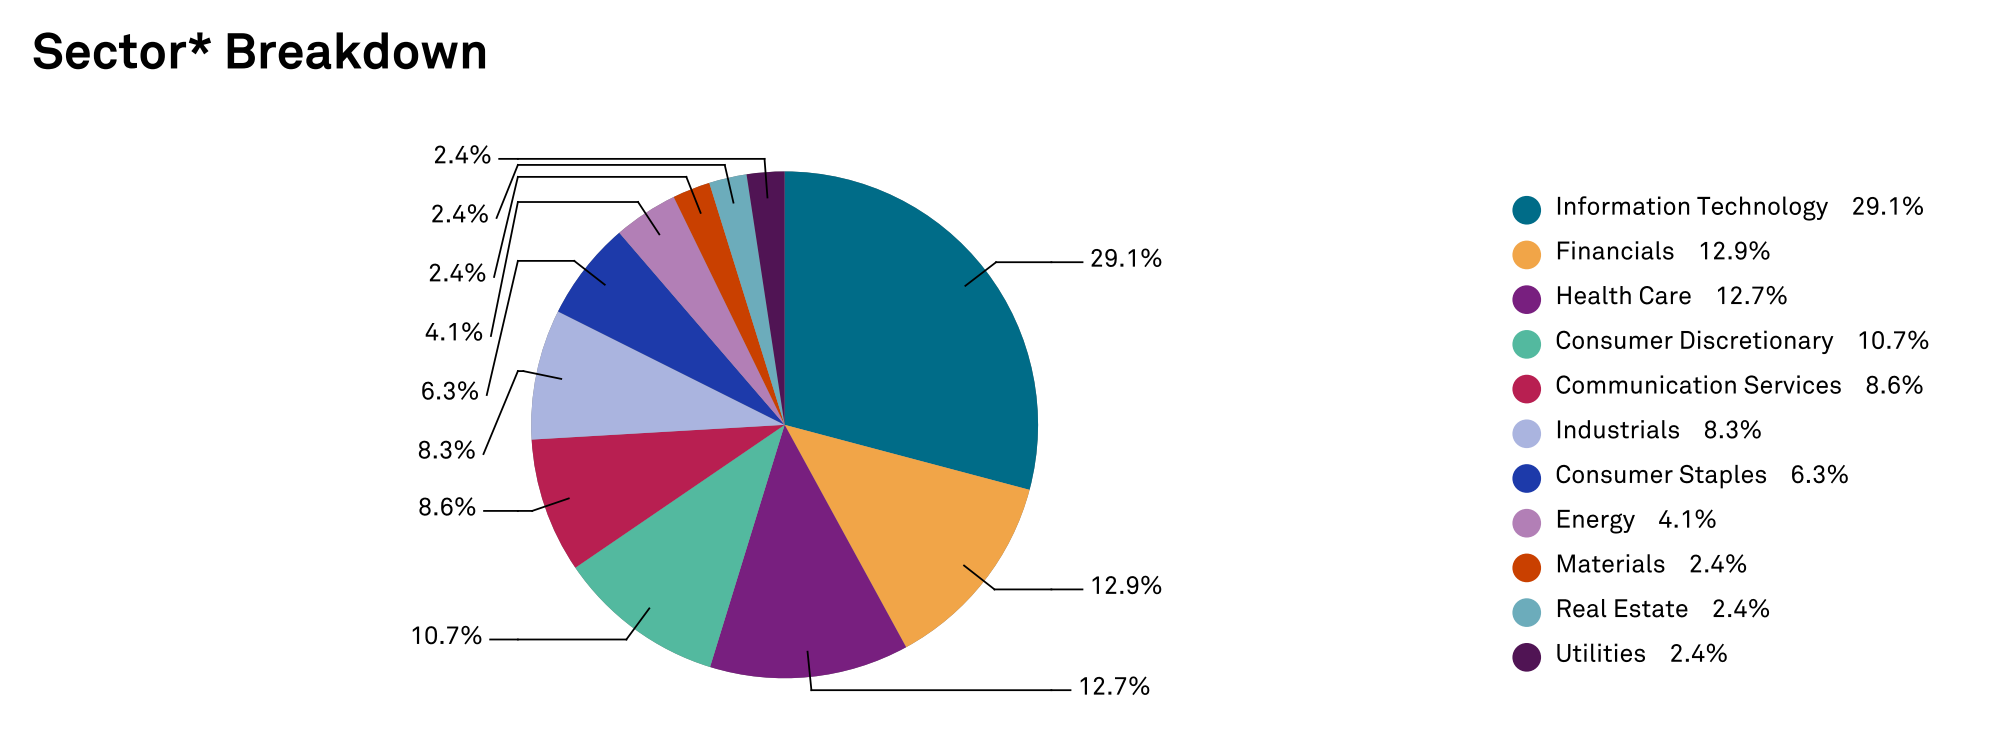

In [5]:
Sub_Sector_distribution = sp500_data['GICS Sub-Industry'].value_counts()

print(Sub_Sector_distribution)

Health Care Equipment                           18
Semiconductors                                  15
Electric Utilities                              14
Industrial Machinery & Supplies & Components    14
Multi-Utilities                                 12
                                                ..
Technology Distributors                          1
Leisure Products                                 1
Consumer Electronics                             1
Copper                                           1
Household Appliances                             1
Name: GICS Sub-Industry, Length: 126, dtype: int64


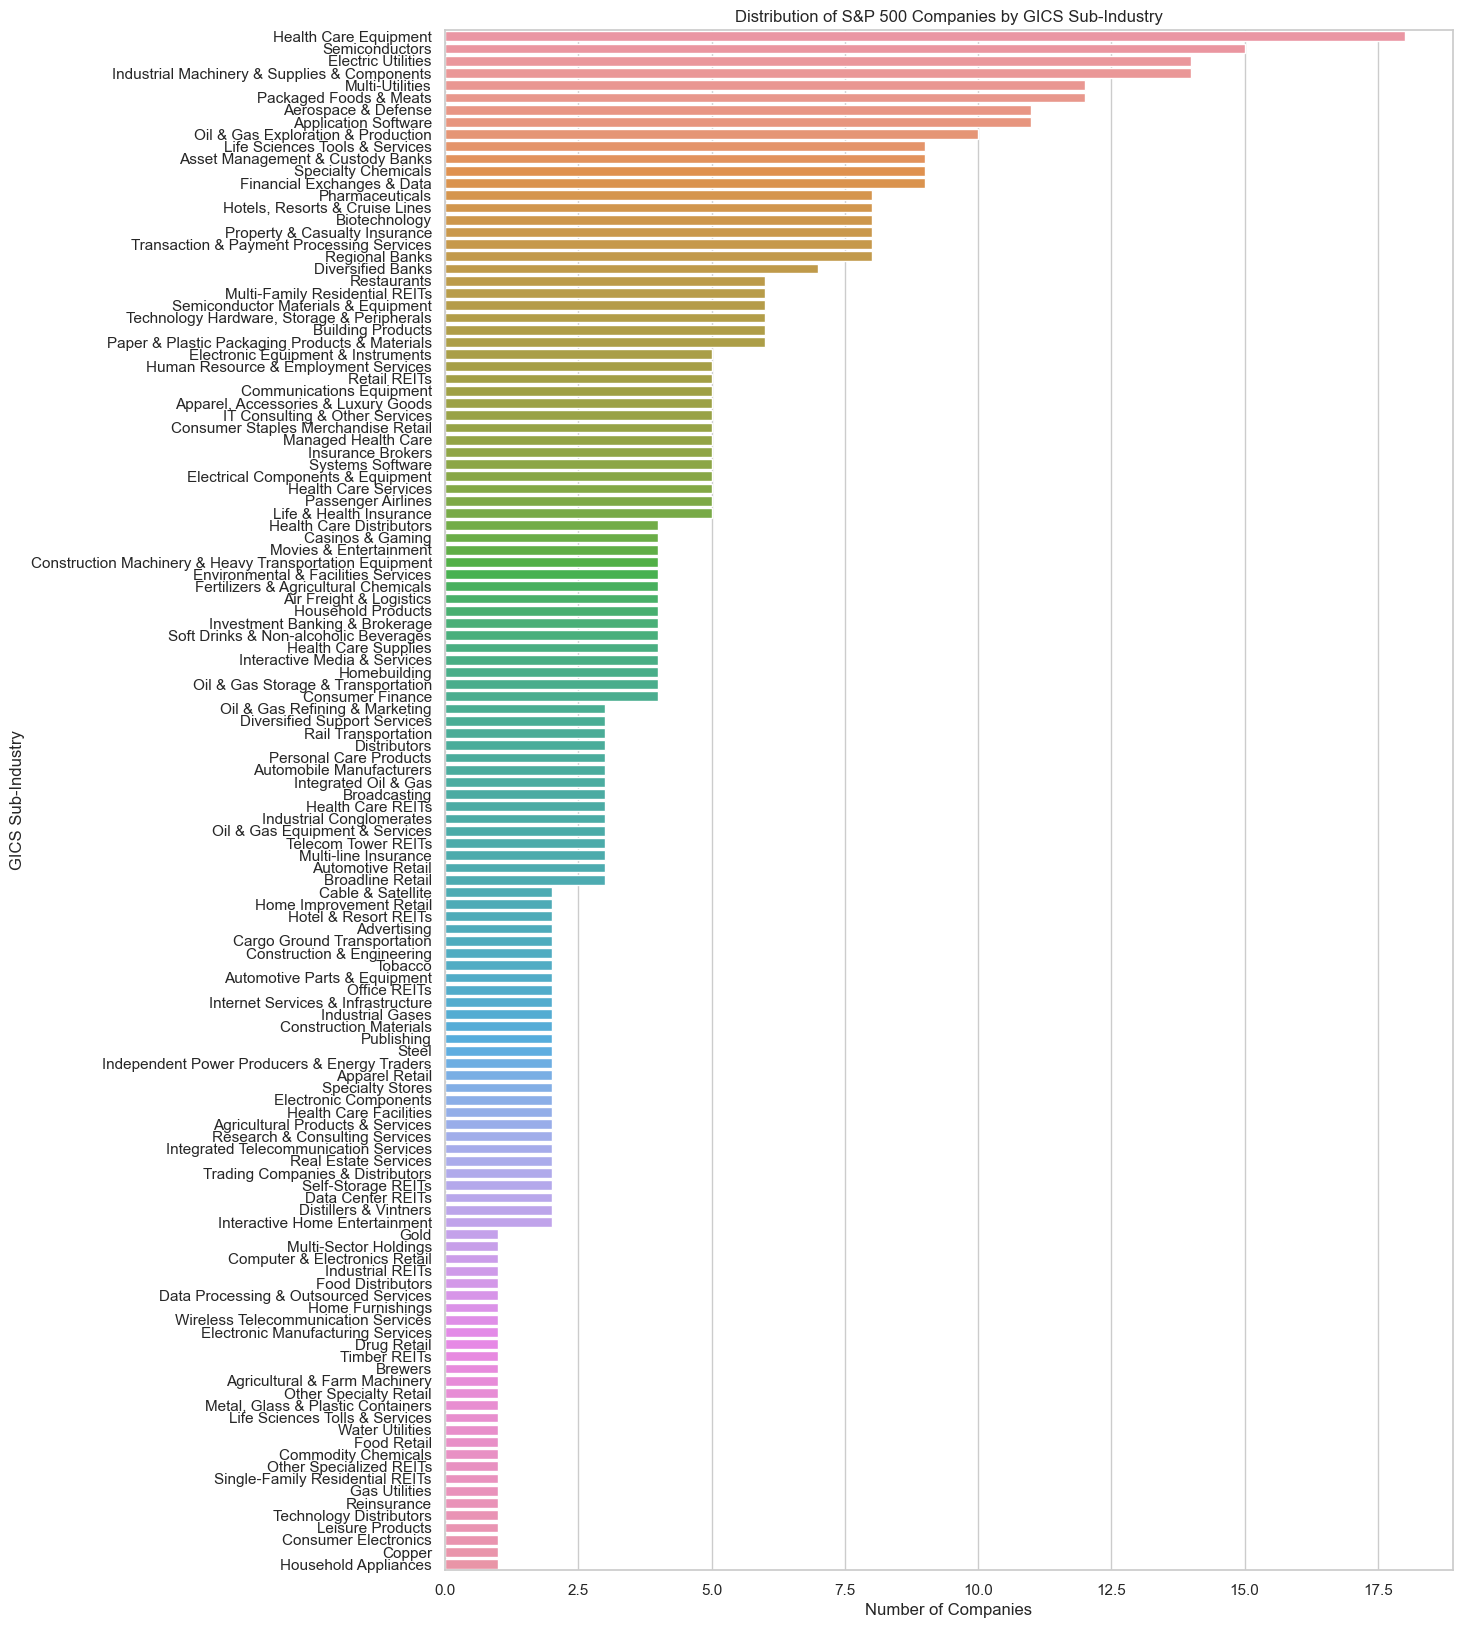

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算GICS子行业的分布
sub_sector_distribution = sp500_data['GICS Sub-Industry'].value_counts()

# 设置绘图样式
sns.set(style="whitegrid")

# 绘制GICS子行业的分布
plt.figure(figsize=(13, 20))
sub_sector_distribution_plot = sns.barplot(x=sub_sector_distribution.values, y=sub_sector_distribution.index)
plt.title('Distribution of S&P 500 Companies by GICS Sub-Industry')
plt.xlabel('Number of Companies')
plt.ylabel('GICS Sub-Industry')

# 显示图表
plt.show()



In [10]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ticker             503 non-null    object
 1   GICS Sector        503 non-null    object
 2   GICS Sub-Industry  503 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [18]:
import yfinance as yf
import pandas as pd

# 定义日期范围
end_date = '2023-12-01'
start_date = '2015-01-01'

# 读取 CSV 文件以获取股票代码
tickers_df = pd.read_csv('/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14（Data acquisition& Preprocessing）/sp500_tickers_gics_sectors_industry.csv', header=0)
# 获取tickers_df中的股票代码
tickers = tickers_df['Ticker'].tolist()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA'

In [19]:
# 初始化成功和失败的计数器
success_count = 0
failure_count = 0
# 指定保存文件的路径
save_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14（Data acquisition& Preprocessing）/S&P500_original_data/'
# 为每个股票代码获取数据
for ticker in tickers:
    try:
        # 使用 yfinance 获取股票数据
        data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

        # 检查是否有数据
        if not data.empty:
            # 保存数据为 CSV 文件
            data.to_csv(f'{save_path}{ticker}_stock_data.csv')
            success_count += 1
            print(f"数据已保存：{ticker}_stock_data.csv")
        else:
            failure_count += 1
            print(f"没有找到第{success_count + failure_count} 支股票 {ticker} 的数据。")

    except Exception as e:
        failure_count += 1
        print(f"处理 {ticker} 时发生错误：{e}")

    # 打印成功和失败的计数
    print(f"已成功保存 {success_count} 支股票数据，未能保存 {failure_count} 支股票数据。")

print("所有数据处理完毕。")


[*********************100%%**********************]  1 of 1 completed
数据已保存：MMM_stock_data.csv
已成功保存 1 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：AOS_stock_data.csv
已成功保存 2 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：ABT_stock_data.csv
已成功保存 3 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：ABBV_stock_data.csv
已成功保存 4 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：ACN_stock_data.csv
已成功保存 5 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：ADBE_stock_data.csv
已成功保存 6 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：AMD_stock_data.csv
已成功保存 7 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：AES_stock_data.csv
已成功保存 8 支股票数据，未能保存 0 支股票数据。
[*********************


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



没有找到第64 支股票 BRK.B 的数据。
已成功保存 63 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BBY_stock_data.csv
已成功保存 64 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BIO_stock_data.csv
已成功保存 65 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：TECH_stock_data.csv
已成功保存 66 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BIIB_stock_data.csv
已成功保存 67 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BLK_stock_data.csv
已成功保存 68 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BX_stock_data.csv
已成功保存 69 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BA_stock_data.csv
已成功保存 70 支股票数据，未能保存 1 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BKNG_stock_


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-12-01)')



没有找到第80 支股票 BF.B 的数据。
已成功保存 78 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BG_stock_data.csv
已成功保存 79 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：CDNS_stock_data.csv
已成功保存 80 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：CZR_stock_data.csv
已成功保存 81 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：CPT_stock_data.csv
已成功保存 82 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：CPB_stock_data.csv
已成功保存 83 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：COF_stock_data.csv
已成功保存 84 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：CAH_stock_data.csv
已成功保存 85 支股票数据，未能保存 2 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：KMX_stock_da


1 Failed download:
['RTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-12-01)')



没有找到第394 支股票 RTX 的数据。
已成功保存 391 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：O_stock_data.csv
已成功保存 392 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：REG_stock_data.csv
已成功保存 393 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：REGN_stock_data.csv
已成功保存 394 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：RF_stock_data.csv
已成功保存 395 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：RSG_stock_data.csv
已成功保存 396 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：RMD_stock_data.csv
已成功保存 397 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：RVTY_stock_data.csv
已成功保存 398 支股票数据，未能保存 3 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：RHI_s


1 Failed download:
['SNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-12-01)')



没有找到第420 支股票 SNA 的数据。
已成功保存 416 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：SEDG_stock_data.csv
已成功保存 417 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：SO_stock_data.csv
已成功保存 418 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：LUV_stock_data.csv
已成功保存 419 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：SWK_stock_data.csv
已成功保存 420 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：SBUX_stock_data.csv
已成功保存 421 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：STT_stock_data.csv
已成功保存 422 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：STLD_stock_data.csv
已成功保存 423 支股票数据，未能保存 4 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：ST

从雅虎Finance上未能直接下载的股票：SNA、RTX、BF.B、BRK.B

In [21]:
# 初始化成功和失败的计数器
success_count = 0
failure_count = 0
# 指定保存文件的路径
save_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14（Data acquisition& Preprocessing）/S&P500_original_data/'
# 为每个股票代码获取数据
new_tickers = ['BF-B','BRK-B']
for ticker in new_tickers:
    try:
        # 使用 yfinance 获取股票数据
        data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

        # 检查是否有数据
        if not data.empty:
            # 保存数据为 CSV 文件
            data.to_csv(f'{save_path}{ticker}_stock_data.csv')
            success_count += 1
            print(f"数据已保存：{ticker}_stock_data.csv")
        else:
            failure_count += 1
            print(f"没有找到第{success_count + failure_count} 支股票 {ticker} 的数据。")

    except Exception as e:
        failure_count += 1
        print(f"处理 {ticker} 时发生错误：{e}")

    # 打印成功和失败的计数
    print(f"已成功保存 {success_count} 支股票数据，未能保存 {failure_count} 支股票数据。")

print("所有数据处理完毕。")


[*********************100%%**********************]  1 of 1 completed
数据已保存：BF-B_stock_data.csv
已成功保存 1 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：BRK-B_stock_data.csv
已成功保存 2 支股票数据，未能保存 0 支股票数据。
所有数据处理完毕。


In [22]:
# 初始化成功和失败的计数器
success_count = 0
failure_count = 0
# 指定保存文件的路径
save_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14（Data acquisition& Preprocessing）/S&P500_original_data/'
# 为每个股票代码获取数据
new_tickers = ['SNA','RTX']
for ticker in new_tickers:
    try:
        # 使用 yfinance 获取股票数据
        data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

        # 检查是否有数据
        if not data.empty:
            # 保存数据为 CSV 文件
            data.to_csv(f'{save_path}{ticker}_stock_data.csv')
            success_count += 1
            print(f"数据已保存：{ticker}_stock_data.csv")
        else:
            failure_count += 1
            print(f"没有找到第{success_count + failure_count} 支股票 {ticker} 的数据。")

    except Exception as e:
        failure_count += 1
        print(f"处理 {ticker} 时发生错误：{e}")

    # 打印成功和失败的计数
    print(f"已成功保存 {success_count} 支股票数据，未能保存 {failure_count} 支股票数据。")

print("所有数据处理完毕。")


[*********************100%%**********************]  1 of 1 completed
数据已保存：SNA_stock_data.csv
已成功保存 1 支股票数据，未能保存 0 支股票数据。
[*********************100%%**********************]  1 of 1 completed
数据已保存：RTX_stock_data.csv
已成功保存 2 支股票数据，未能保存 0 支股票数据。
所有数据处理完毕。


将属于同一行业的股票ticker进行聚类，将聚类结果保存到CSV文件中

In [23]:
# 重新加载数据
sp500_data = pd.read_csv(file_path)

# 按照GICS Sub-Industry进行分类
grouped_data = sp500_data.groupby('GICS Sub-Industry')['Ticker'].apply(list).to_dict()

# 将分类好的数据转换成DataFrame
classified_data_df = pd.DataFrame(list(grouped_data.items()), columns=['GICS Sub-Industry', 'Tickers'])

# 保存到新的CSV文件
classified_file_path = './classified_by_gics_sub_industry_sp500_tickers.csv'
classified_data_df.to_csv(classified_file_path, index=False)

classified_data_df.head()  # 显示文件路径和部分数据



,GICS Sub-Industry,Tickers
0,Advertising,"[IPG, OMC]"
1,Aerospace & Defense,"[AXON, BA, GD, HWM, HII, LHX, LMT, NOC, RTX, T..."
2,Agricultural & Farm Machinery,[DE]
3,Agricultural Products & Services,"[ADM, BG]"
4,Air Freight & Logistics,"[CHRW, EXPD, FDX, UPS]"


In [1]:
import os
import pandas as pd

# 设置文件夹路径
folder_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/S&P500_original_data'

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # 检查文件是否为CSV格式
        file_path = os.path.join(folder_path, filename)
        try:
            # 读取CSV文件
            data = pd.read_csv(file_path)
            # 打印文件名和数据形状
            print(f"{filename}: {data.shape}")
        except Exception as e:
            print(f"Error reading {filename}: {e}")



AIG_stock_data.csv: (2244, 7)
FOX_stock_data.csv: (1190, 7)
PH_stock_data.csv: (2244, 7)
CZR_stock_data.csv: (2244, 7)
JNPR_stock_data.csv: (2244, 7)
DE_stock_data.csv: (2244, 7)
PTC_stock_data.csv: (2244, 7)
EQT_stock_data.csv: (2244, 7)
ARE_stock_data.csv: (2244, 7)
LULU_stock_data.csv: (2244, 7)
NVR_stock_data.csv: (2244, 7)
BA_stock_data.csv: (2244, 7)
DPZ_stock_data.csv: (2244, 7)
CL_stock_data.csv: (2244, 7)
JBHT_stock_data.csv: (2244, 7)
GOOGL_stock_data.csv: (2244, 7)
AEP_stock_data.csv: (2244, 7)
ROP_stock_data.csv: (2244, 7)
SYK_stock_data.csv: (2244, 7)
COR_stock_data.csv: (2244, 7)
XYL_stock_data.csv: (2244, 7)
ORCL_stock_data.csv: (2244, 7)
ETSY_stock_data.csv: (2173, 7)
CMG_stock_data.csv: (2244, 7)
TFC_stock_data.csv: (2244, 7)
PNC_stock_data.csv: (2244, 7)
EG_stock_data.csv: (2244, 7)
TDY_stock_data.csv: (2244, 7)
CMCSA_stock_data.csv: (2244, 7)
AAPL_stock_data.csv: (2244, 7)
CDNS_stock_data.csv: (2244, 7)
CARR_stock_data.csv: (933, 7)
TMUS_stock_data.csv: (2244, 7)
MAR

In [4]:
import os
import pandas as pd

# 设置文件夹路径
folder_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/S&P500_original_data'

# 初始化股票代码和形状列表
qualified_tickers = []
unqualified_tickers = []

# 假设所有股票在同一交易日内进行交易，计算总交易日数
sample_file = next((filename for filename in os.listdir(folder_path) if filename.endswith('.csv')), None)
if sample_file:
    sample_data = pd.read_csv(os.path.join(folder_path, sample_file))
    total_trading_days = len(sample_data)

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            # 读取CSV文件
            data = pd.read_csv(file_path)
            ticker_info = (filename.split('.')[0], data.shape)  # 假设文件名是股票代码
            # 计算交易日数量并比较
            if len(data) / total_trading_days >= 0.98:
                qualified_tickers.append(ticker_info)
            else:
                unqualified_tickers.append(ticker_info)
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# 按字母顺序排序并打印股票代码和形状
qualified_tickers.sort()
unqualified_tickers.sort()

print("Tickers traded on more than 98% of trading days:")
for i, (ticker, shape) in enumerate(qualified_tickers, 1):
    print(f"{i}. {ticker}, Shape: {shape}")

print("\nTickers NOT traded on more than 98% of trading days:")
for i, (ticker, shape) in enumerate(unqualified_tickers, 1):
    print(f"{i}. {ticker}, Shape: {shape}")


Tickers traded on more than 98% of trading days:
1. AAL_stock_data, Shape: (2244, 7)
2. AAPL_stock_data, Shape: (2244, 7)
3. ABBV_stock_data, Shape: (2244, 7)
4. ABT_stock_data, Shape: (2244, 7)
5. ACGL_stock_data, Shape: (2244, 7)
6. ACN_stock_data, Shape: (2244, 7)
7. ADBE_stock_data, Shape: (2244, 7)
8. ADI_stock_data, Shape: (2244, 7)
9. ADM_stock_data, Shape: (2244, 7)
10. ADP_stock_data, Shape: (2244, 7)
11. ADSK_stock_data, Shape: (2244, 7)
12. AEE_stock_data, Shape: (2244, 7)
13. AEP_stock_data, Shape: (2244, 7)
14. AES_stock_data, Shape: (2244, 7)
15. AFL_stock_data, Shape: (2244, 7)
16. AIG_stock_data, Shape: (2244, 7)
17. AIZ_stock_data, Shape: (2244, 7)
18. AJG_stock_data, Shape: (2244, 7)
19. AKAM_stock_data, Shape: (2244, 7)
20. ALB_stock_data, Shape: (2244, 7)
21. ALGN_stock_data, Shape: (2244, 7)
22. ALK_stock_data, Shape: (2244, 7)
23. ALLE_stock_data, Shape: (2244, 7)
24. ALL_stock_data, Shape: (2244, 7)
25. AMAT_stock_data, Shape: (2244, 7)
26. AMCR_stock_data, Shape

Summary：S&P500中一共有503支股票，符合条件：have been traded on more than 98% of trading days 的股票一共有478支，不符合条件的股票有25支。

In [10]:
new_file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/sp500_tickers_gics_sectors_industry(478_stocks).csv'
# 重新加载数据
sp500_data_478 = pd.read_csv(new_file_path)

# 按照GICS Sub-Industry进行分类
grouped_data = sp500_data_478.groupby('GICS Sub-Industry')['Ticker'].apply(list).to_dict()

# 将分类好的数据转换成DataFrame
classified_data_df = pd.DataFrame(list(grouped_data.items()), columns=['GICS Sub-Industry', 'Tickers'])

# 保存到新的CSV文件
classified_file_path = './classified_by_gics_sub_industry_sp500_tickers_478.csv'
classified_data_df.to_csv(classified_file_path, index=False)

classified_data_df.head()  # 显示文件路径和部分数据

,GICS Sub-Industry,Tickers
0,Advertising,"[IPG, OMC]"
1,Aerospace & Defense,"[AXON, BA, GD, HII, LHX, LMT, NOC, RTX, TXT, TDG]"
2,Agricultural & Farm Machinery,[DE]
3,Agricultural Products & Services,"[ADM, BG]"
4,Air Freight & Logistics,"[CHRW, EXPD, FDX, UPS]"


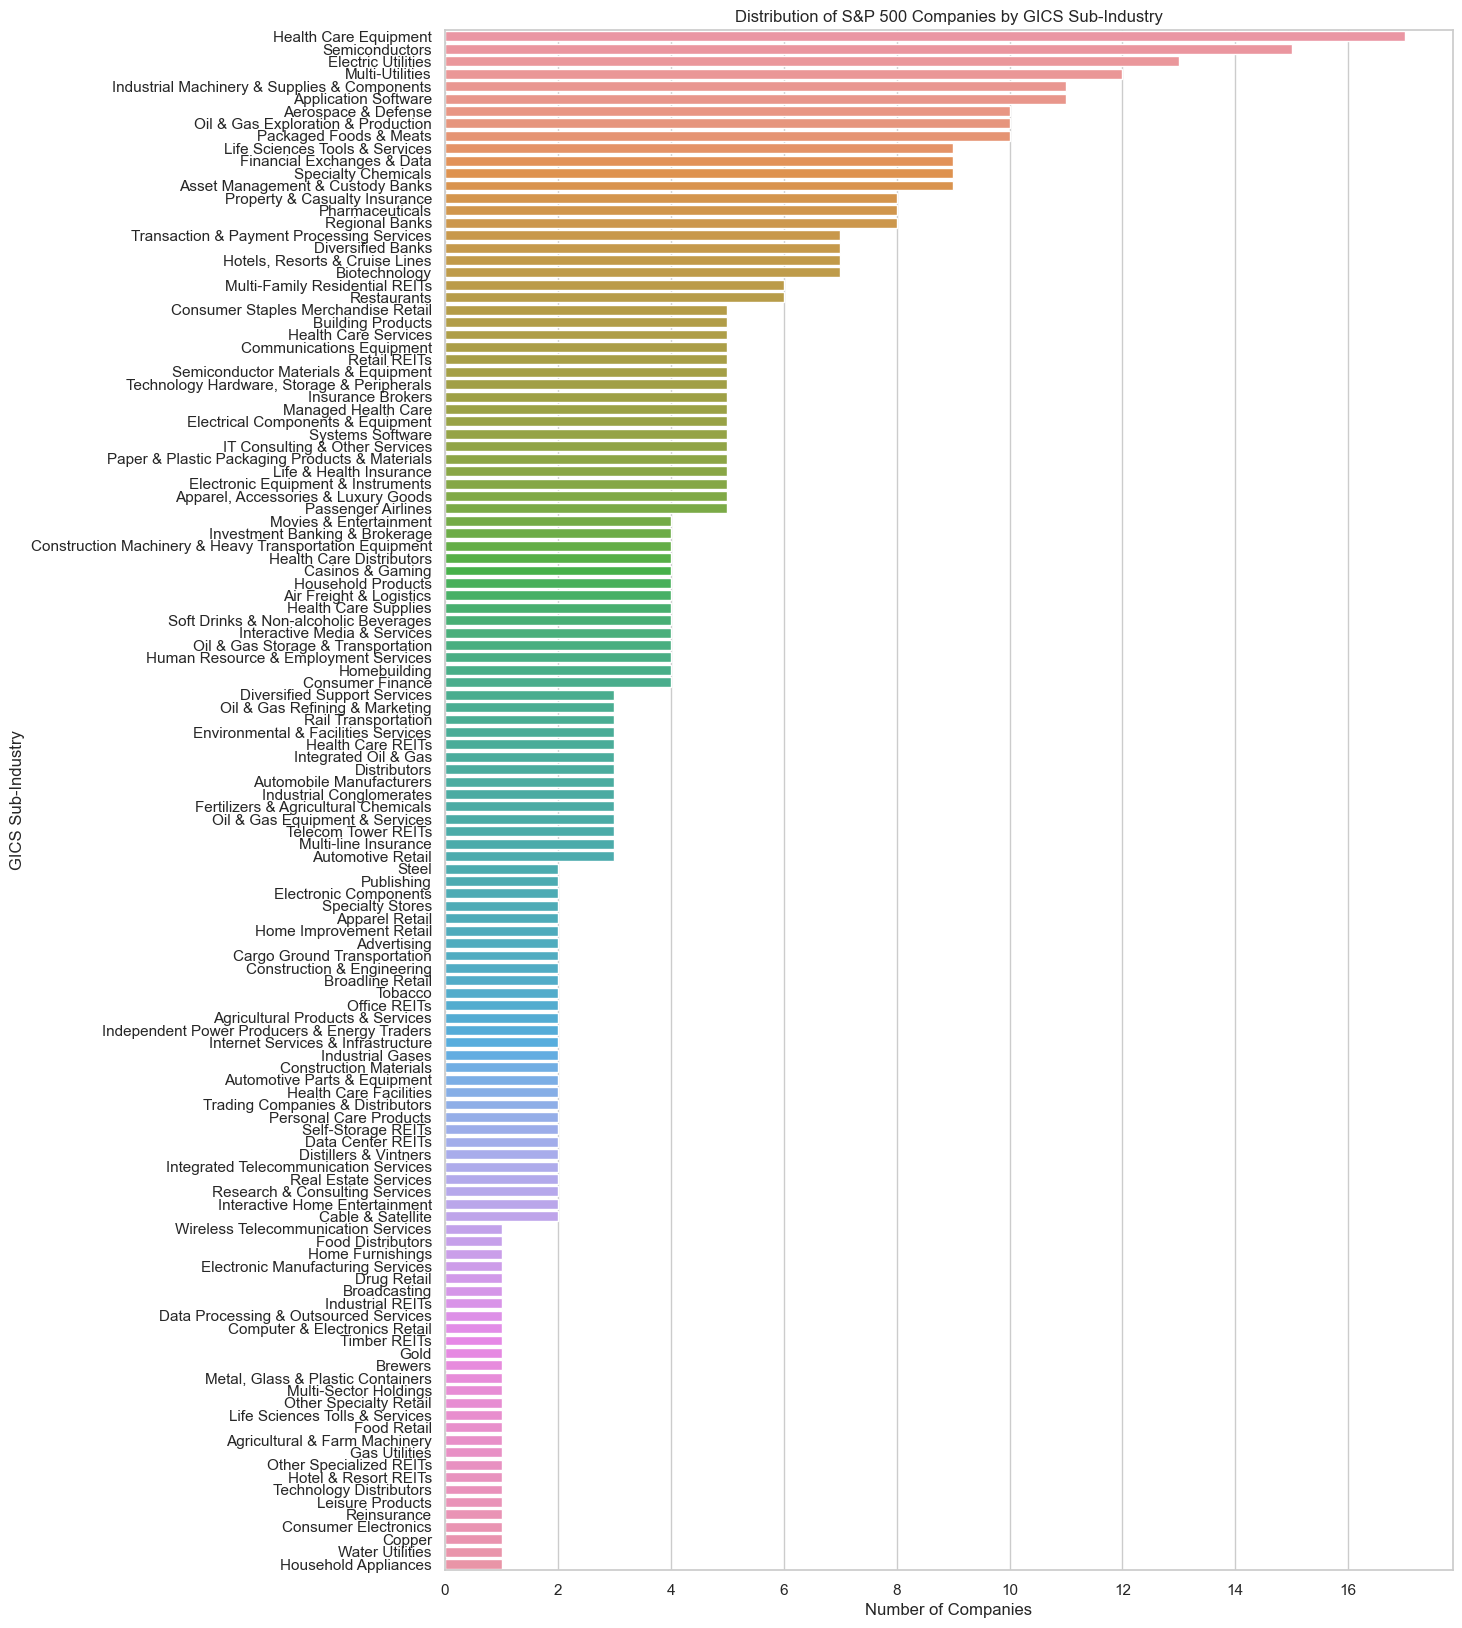

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算GICS子行业的分布
sub_sector_distribution = sp500_data_478['GICS Sub-Industry'].value_counts()

# 设置绘图样式
sns.set(style="whitegrid")

# 绘制GICS子行业的分布
plt.figure(figsize=(13, 20))
sub_sector_distribution_plot = sns.barplot(x=sub_sector_distribution.values, y=sub_sector_distribution.index)
plt.title('Distribution of S&P 500 Companies by GICS Sub-Industry')
plt.xlabel('Number of Companies')
plt.ylabel('GICS Sub-Industry')

# 显示图表
plt.show()


In [12]:
Sub_Sector_distribution = sp500_data_478['GICS Sub-Industry'].value_counts()

print(Sub_Sector_distribution)

Health Care Equipment                           17
Semiconductors                                  15
Electric Utilities                              13
Multi-Utilities                                 12
Industrial Machinery & Supplies & Components    11
                                                ..
Reinsurance                                      1
Consumer Electronics                             1
Copper                                           1
Water Utilities                                  1
Household Appliances                             1
Name: GICS Sub-Industry, Length: 124, dtype: int64


In [13]:
# 分析GICS行业的分布
sector_distribution = sp500_data_478['GICS Sector'].value_counts()

print(sector_distribution)

Financials                71
Industrials               70
Health Care               62
Information Technology    62
Consumer Discretionary    51
Consumer Staples          35
Utilities                 29
Real Estate               29
Materials                 26
Energy                    23
Communication Services    20
Name: GICS Sector, dtype: int64


## 获取S&P 500 数据，并进行前一日买入，后一日卖出操作，计算收益率

In [16]:
import pandas as pd
import yfinance as yf

# Define the stock ticker and the date range
ticker = "^GSPC"  # S&P 500 ticker symbol
start_date = "2015-02-13"
end_date = "2023-12-01"

# Download the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# # Calculate the returns (using adjusted close prices)
# data['Daily Return'] = data['Adj Close'].pct_change()

# # Shift the returns by one day to simulate buying at the close of the previous day
# # and selling at the close of the current day
# data['Shifted Daily Return'] = data['Daily Return'].shift(-1)

# # Remove the last row as its return will be NaN due to the shift
# 只保留'Date','Adj Close'两列
data = data[['Adj Close']]

# Save the data to a CSV file
data.to_csv("SP500_daily_returns_1.csv")

# Optionally, display the first few rows of the dataframe
print(data.head())


[*********************100%%**********************]  1 of 1 completed
              Adj Close
Date                   
2015-02-13  2096.989990
2015-02-17  2100.340088
2015-02-18  2099.679932
2015-02-19  2097.449951
2015-02-20  2110.300049


Index(['Adj Close'], dtype='object')


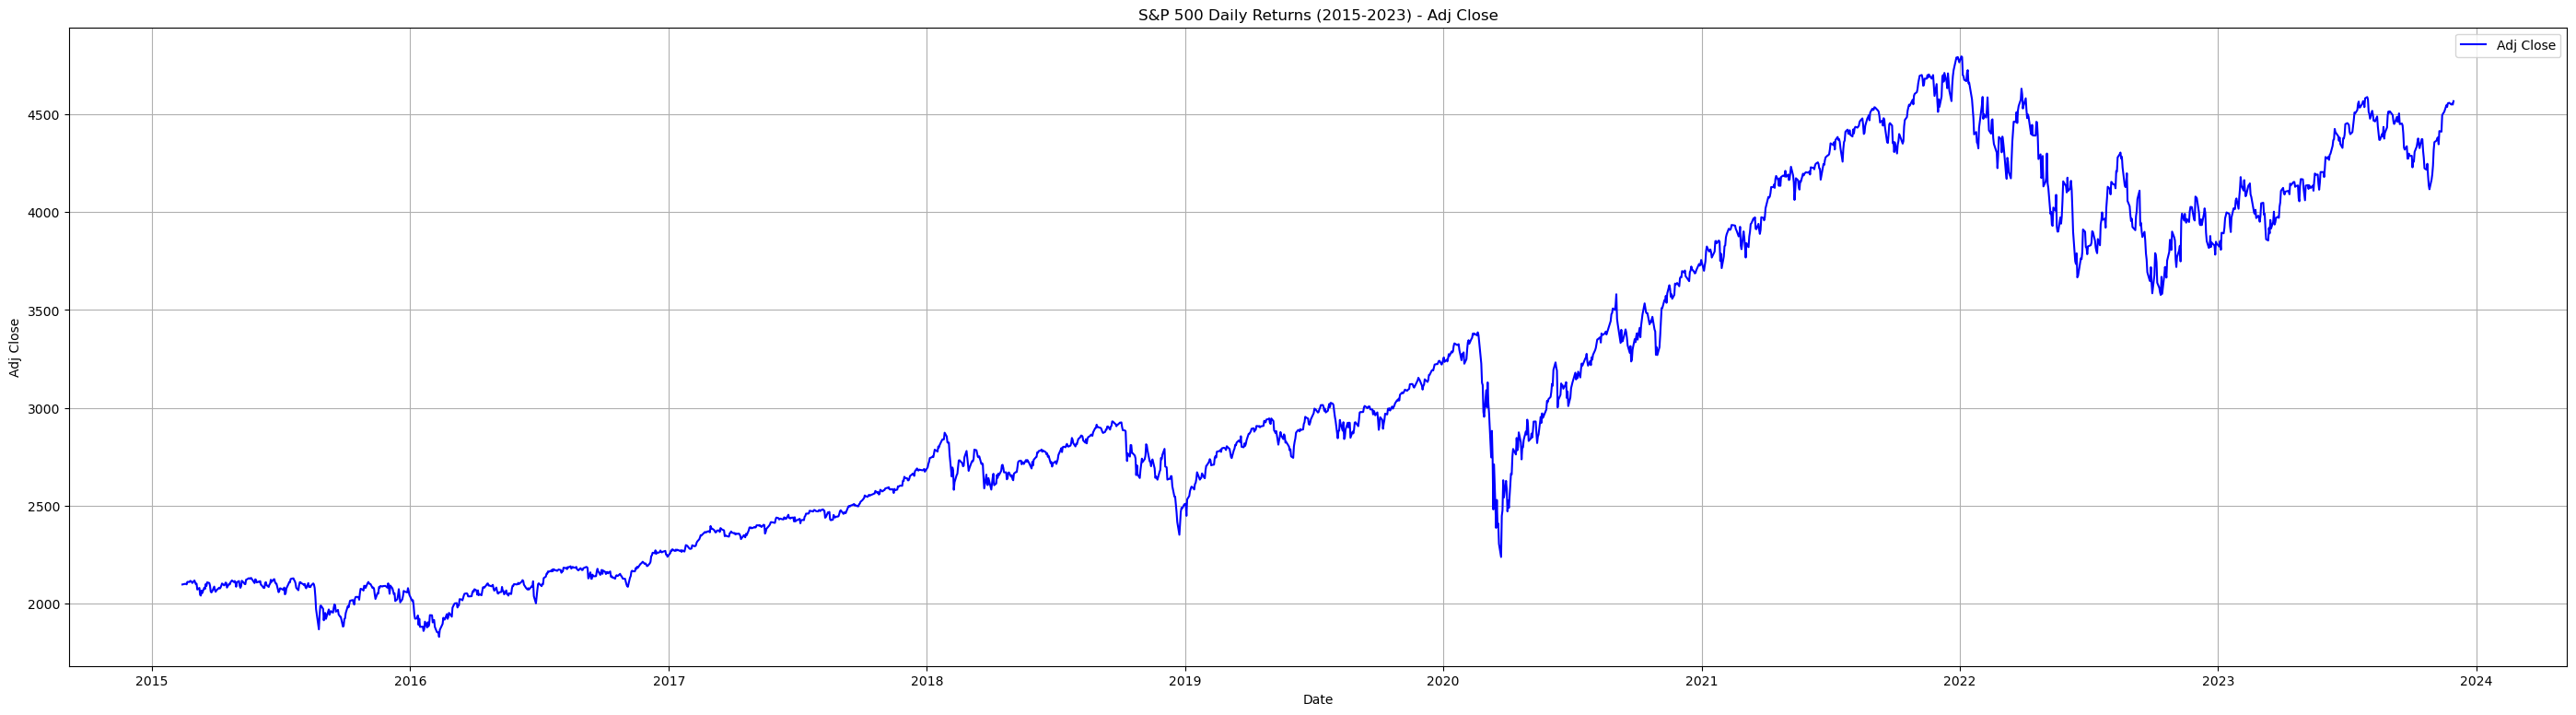

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data from the CSV file
file_path = 'SP500_daily_returns_1.csv'
data = pd.read_csv(file_path, parse_dates=True, index_col='Date')

# Check the column names to ensure the correct column is plotted
print(data.columns)

# If "Shifted Daily Return" is not a column, we will plot the available return column instead
# Plotting the daily returns
plt.figure(figsize=(35, 9))
plt.plot(data.index, data[data.columns[-1]], label=data.columns[-1], color='blue')  # Plot the last column
plt.title(f'S&P 500 Daily Returns (2015-2023) - {data.columns[-1]}')
plt.xlabel('Date')
plt.ylabel(data.columns[-1])
plt.grid(True)
plt.legend()
plt.show()


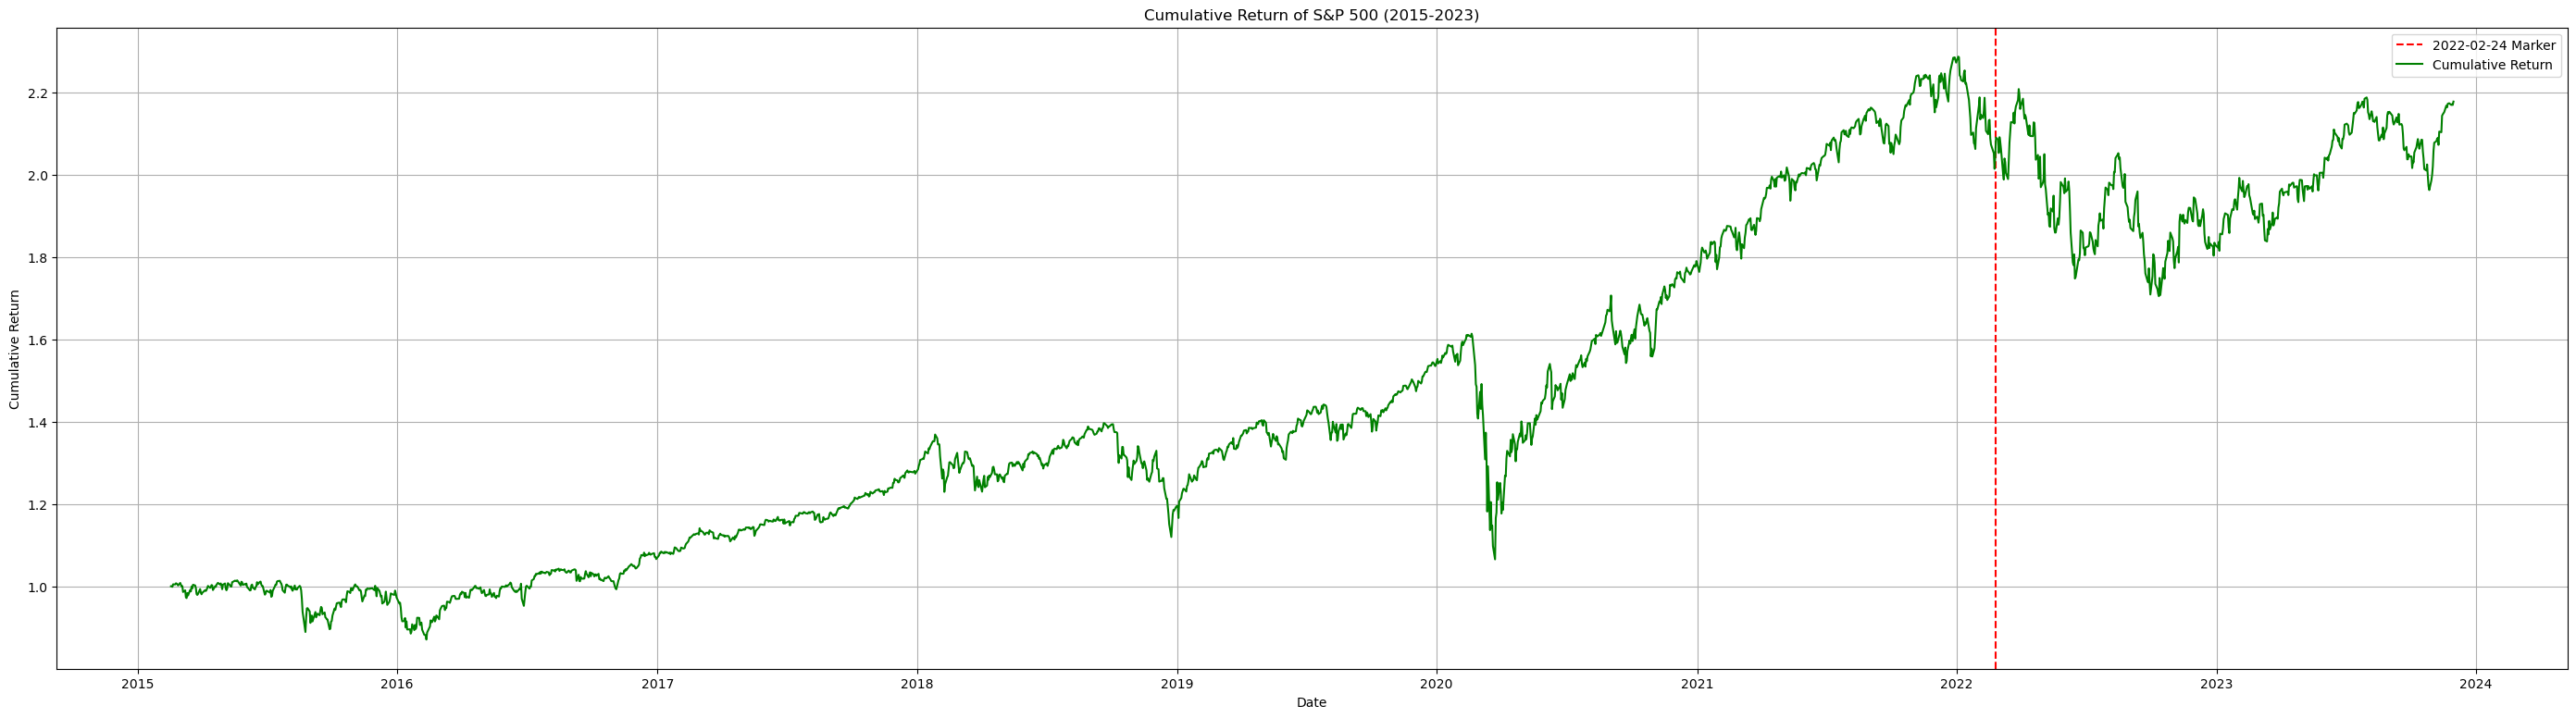

In [41]:
# Calculating the cumulative returns from the adjusted closing prices
data['Cumulative Return'] = (1 + data['Adj Close'].pct_change()).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(35, 9))
plt.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', label='2022-02-24 Marker')
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('Cumulative Return of S&P 500 (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()



In [43]:
# Re-loading the data from the provided CSV file to calculate daily returns
file_path = 'SP500_daily_returns_1.csv'
data = pd.read_csv(file_path, parse_dates=True, index_col='Date')

# Calculating daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Displaying the first few rows of the data with the calculated daily returns
data.head()


,Adj Close,Daily Return
Date,,
2015-02-13,2096.989990,NaN
2015-02-17,2100.340088,0.001598
2015-02-18,2099.679932,-0.000314
2015-02-19,2097.449951,-0.001062
2015-02-20,2110.300049,0.006127


In [44]:
(2100.340088-2096.989990)/2096.989990

0.001597574626476824

/var/folders/76/ppmt88tn6_x_bhfvn4bd_5f80000gn/T/ipykernel_16122/329494293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_443_days_data['Cumulative Return'] = last_443_days_data['Daily Return'].cumsum()


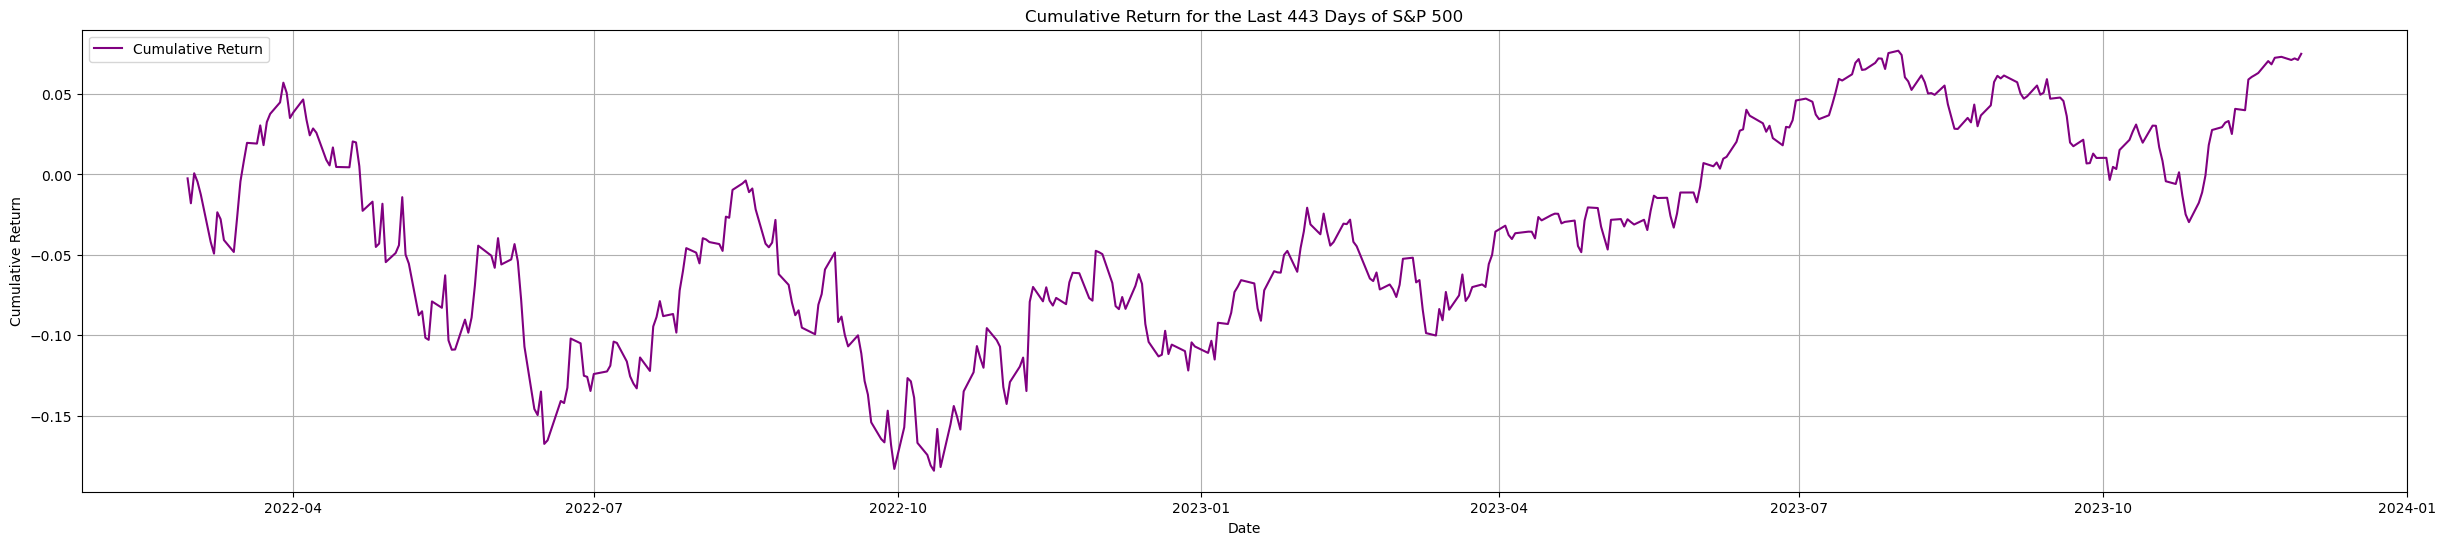

Date 443 days ago: 2022-02-28
Most recent date: 2023-11-30


In [51]:

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Select the last 443 days of data
last_443_days_data = data[-443:]

# Calculate the cumulative returns for the last 443 days, starting from 0
last_443_days_data['Cumulative Return'] = last_443_days_data['Daily Return'].cumsum()

# Plotting the cumulative returns for the last 443 days
plt.figure(figsize=(30, 6))
plt.plot(last_443_days_data.index, last_443_days_data['Cumulative Return'], label='Cumulative Return', color='purple')
plt.title('Cumulative Return for the Last 443 Days of S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()

# Printing the dates
print("Date 443 days ago:", last_443_days_data.index[0].strftime('%Y-%m-%d'))
print("Most recent date:", last_443_days_data.index[-1].strftime('%Y-%m-%d'))
